**Data Augmentation Comparison**

In [ ]:
from utils import fashionmnist_dataloader,train_mixup, val
from utils import ResNet18

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Import Library

In [ ]:
# baseline cnn model for fashion mnist
import numpy as np

import matplotlib.pyplot as plt


import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import Adam


**1. Initialize Device**

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

device

device(type='cuda')

**Get respective combination of original data and augmented data and their dataloader**

*MixUp*

In [ ]:
# Define Mixup Dataloader
batch_size = 50
mixup_train_loader, mixup_val_loader, mixup_test_loader = fashionmnist_dataloader(batch_size,basic_aug = False)

100%|██████████| 26421880/26421880 [00:01<00:00, 16776179.79it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 274275.69it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4983704.87it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 16855797.81it/s]
/opt/conda/lib/python3.10/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 26421880/26421880 [00:01<00:00, 14069605.07it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 272976.59it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4989857.63it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 9076198.82it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



**Training of Resnet with different dataloader......**

Define model

In [ ]:
num_classes = 10

In [ ]:
# For MixUp
criterion_mixup = nn.CrossEntropyLoss()
model_mixup = ResNet18(num_classes).to(device)
optimizer_mixup = Adam(model_mixup.parameters(), lr=3e-4)

model_mixup

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 188MB/s]


ResNet18(
  (model): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (downsample): Identity()
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, mome

*Start training* **( T^T )**

MixUp Part

In [ ]:
# MixUp
num_epochs=10
print("MixUp")
mixup_train_losses, mixup_test_losses = [], []
mixup_train_accuracies, mixup_test_accuracies = [], []

for epoch in range(1, num_epochs + 1):
        train_acc, train_loss = train_mixup(model_mixup, criterion_mixup, mixup_train_loader, optimizer_mixup, epoch, 2.5, device)
        test_acc, test_loss = val(model_mixup, criterion_mixup, mixup_val_loader, device)

        mixup_train_accuracies.append(train_acc)
        mixup_train_losses.append(train_loss)
        mixup_test_accuracies.append(test_acc)
        mixup_test_losses.append(test_loss)


MixUp
Train Epoch: 1	Average Loss: 1.509343	Accuracy: 37.85%
Val Loss: 2.2204, Val Accuracy: 33.46%
Train Epoch: 2	Average Loss: 1.331283	Accuracy: 45.17%
Val Loss: 1.0156, Val Accuracy: 69.07%
Train Epoch: 3	Average Loss: 1.245307	Accuracy: 48.94%
Val Loss: 1.1395, Val Accuracy: 58.87%
Train Epoch: 4	Average Loss: 1.182938	Accuracy: 51.70%
Val Loss: 0.9481, Val Accuracy: 69.92%
Train Epoch: 5	Average Loss: 1.139413	Accuracy: 53.41%
Val Loss: 0.7945, Val Accuracy: 77.79%
Train Epoch: 6	Average Loss: 1.101081	Accuracy: 55.48%
Val Loss: 0.6914, Val Accuracy: 79.85%
Train Epoch: 7	Average Loss: 1.069141	Accuracy: 56.55%
Val Loss: 0.7596, Val Accuracy: 76.40%
Train Epoch: 8	Average Loss: 1.043081	Accuracy: 57.82%
Val Loss: 1.0842, Val Accuracy: 59.47%
Train Epoch: 9	Average Loss: 1.021590	Accuracy: 58.64%
Val Loss: 0.6052, Val Accuracy: 82.86%
Train Epoch: 10	Average Loss: 0.998145	Accuracy: 59.47%
Val Loss: 0.6526, Val Accuracy: 78.02%


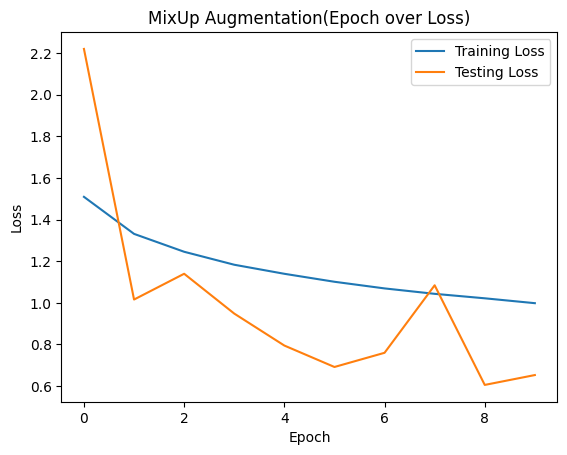

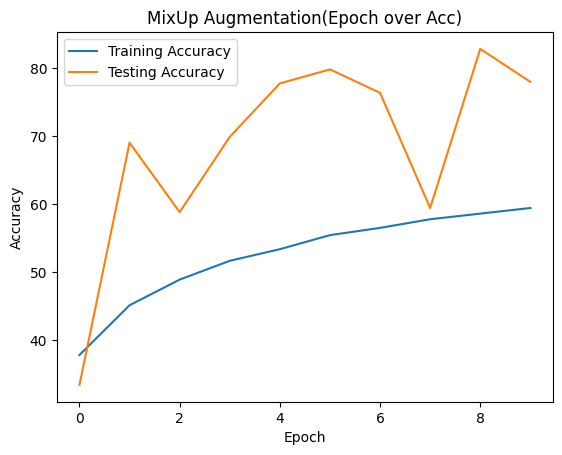

In [ ]:
plt.plot(mixup_train_losses, label="Training Loss")
plt.plot(mixup_test_losses, label="Testing Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("MixUp Augmentation(Epoch over Loss)")
plt.show()


plt.plot(mixup_train_accuracies, label="Training Accuracy")
plt.plot(mixup_test_accuracies, label="Testing Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("MixUp Augmentation(Epoch over Acc)")
plt.legend()
plt.show()